**Prompt exercise**

In [ ]:
csv_data = """custId,custName,custCountry,productSold,salesChannel,unitsSold,dateSold
23262,Candice Levy,Congo,SUPA101,Retail,117,2012-08-09
23263,Xerxes Smith,Panama,DETA200,Online,73,2012-07-06
23264,Levi Douglas,"Tanzania, United Republic of",DETA800,Online,205,2012-08-18
23265,Uriel Benton,South Africa,SUPA104,Online,14,2012-08-05
23266,Celeste Pugh,Gabon,PURA200,Retail,170,2012-08-11
23267,Vance Campos,Syrian Arab Republic,PURA100,Retail,129,2012-07-11
23268,Latifah Wall,Guadeloupe,DETA100,Retail,82,2012-07-12
23269,Jane Hernandez,Macedonia,PURA100,Retail,116,2012-06-03
23270,Wanda Garza,Kyrgyzstan,SUPA103,Online,67,2012-06-07
23271,Athena Fitzpatrick,Reunion,SUPA103,Retail,125,2012-07-27
23272,Anjolie Hicks,Turks and Caicos Islands,DETA200,Retail,71,2012-07-31
23273,Isaac Cooper,Netherlands Antilles,SUPA104,Retail,22,2012-08-13
23274,Asher Weber,Macedonia,PURA100,Direct,153,2012-08-22
23275,Ethan Gregory,Tuvalu,DETA800,Retail,141,2012-07-04
23276,Hayes Rollins,Nepal,PURA500,Direct,65,2012-08-01
23277,MacKenzie Moss,Oman,SUPA101,Online,157,2012-07-12
23278,Aphrodite Brennan,Malawi,SUPA105,Online,197,2012-08-24
23279,Angela Wise,Moldova,PURA100,Direct,10,2012-06-21
23280,James Spencer,Burkina Faso,SUPA103,Direct,30,2012-06-03
23281,Adria Kaufman,Bouvet Island,SUPA102,Online,134,2012-07-13
23282,Amir Alexander,Liberia,DETA100,Online,100,2012-08-21
23283,Lani Sweet,Vanuatu,SUPA105,Online,142,2012-06-24
23284,Clark Weaver,Palau,PURA250,Online,135,2012-06-17
23285,Leonard Cardenas,Madagascar,SUPA102,Online,9,2012-07-24
23286,Renee Padilla,Yemen,DETA800,Retail,69,2012-08-08
23287,Joy Vazquez,Korea,PURA250,Retail,189,2012-06-17
23288,Ingrid Bush,Montserrat,SUPA104,Direct,141,2012-06-14
23289,Deacon Craig,Mongolia,SUPA105,Retail,166,2012-08-02
23290,Rama Goodwin,Tunisia,DETA800,Online,170,2012-08-11
23291,Jelani Odonnell,Albania,DETA800,Retail,199,2012-08-18
23292,Liberty Mcbride,Fiji,SUPA105,Online,73,2012-07-03
23293,Britanni Bender,Angola,SUPA101,Online,117,2012-06-30
23294,Samue"""

file_path = 'customer_country_details.csv'

with open(file_path, 'w') as f:
    f.write(csv_data)

print(f"CSV data saved to '{file_path}'")

CSV data saved to 'customer_country_details.csv'


In [ ]:
import pandas as pd

file_path = 'customer_country_details.csv'

try:
    # Load the data into a pandas DataFrame
    customer_country_df = pd.read_csv(file_path)

    print(f"Successfully loaded data from '{file_path}'.")
    print("First 5 rows of the DataFrame:")
    display(customer_country_df.head())
    print("\nDataFrame Info:")
    customer_country_df.info()

except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please ensure the path is correct.")
except Exception as e:
    print(f"An error occurred while loading the data: {e}")

Successfully loaded data from 'customer_country_details.csv'.
First 5 rows of the DataFrame:


,custId,custName,custCountry,productSold,salesChannel,unitsSold,dateSold
0,23262,Candice Levy,Congo,SUPA101,Retail,117.0,2012-08-09
1,23263,Xerxes Smith,Panama,DETA200,Online,73.0,2012-07-06
2,23264,Levi Douglas,"Tanzania, United Republic of",DETA800,Online,205.0,2012-08-18
3,23265,Uriel Benton,South Africa,SUPA104,Online,14.0,2012-08-05
4,23266,Celeste Pugh,Gabon,PURA200,Retail,170.0,2012-08-11



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   custId        33 non-null     int64  
 1   custName      33 non-null     object 
 2   custCountry   32 non-null     object 
 3   productSold   32 non-null     object 
 4   salesChannel  32 non-null     object 
 5   unitsSold     32 non-null     float64
 6   dateSold      32 non-null     object 
dtypes: float64(1), int64(1), object(5)
memory usage: 1.9+ KB


### Visualize Country-wise Units Sold

To visualize the country-wise units sold on a geo chart, we will perform the following steps:
1.  **Clean Data**: Handle any missing values in `custCountry` and `unitsSold`.
2.  **Aggregate Data**: Group the data by `custCountry` and sum the `unitsSold` for each country.
3.  **Create Geo Chart**: Use `plotly.express` to create a choropleth map, which is ideal for displaying geographical data with color intensity.

In [ ]:
import pandas as pd
import plotly.express as px

# Make a copy to avoid modifying the original DataFrame directly
df_geo = customer_country_df.copy()

# 1. Clean Data: Drop rows where 'custCountry' or 'unitsSold' are missing
df_geo.dropna(subset=['custCountry', 'unitsSold'], inplace=True)

# Ensure 'unitsSold' is numeric (it's already float64, but good practice)
df_geo['unitsSold'] = pd.to_numeric(df_geo['unitsSold'], errors='coerce')
df_geo.dropna(subset=['unitsSold'], inplace=True)

print(f"DataFrame shape after dropping NaNs: {df_geo.shape}")

DataFrame shape after dropping NaNs: (32, 7)


In [ ]:
# 2. Aggregate Data: Sum 'unitsSold' by 'custCountry'
country_sales = df_geo.groupby('custCountry')['unitsSold'].sum().reset_index()
country_sales.rename(columns={'custCountry': 'Country', 'unitsSold': 'Total Units Sold'}, inplace=True)

print("Aggregated country sales:")
display(country_sales.head())

Aggregated country sales:


,Country,Total Units Sold
0,Albania,199.0
1,Angola,117.0
2,Bouvet Island,134.0
3,Burkina Faso,30.0
4,Congo,117.0


In [ ]:
# 3. Create Geo Chart: Choropleth map using plotly.express
fig = px.choropleth(
    country_sales,
    locations='Country',
    locationmode='country names',
    color='Total Units Sold',
    hover_name='Country',
    color_continuous_scale=px.colors.sequential.Plasma,
    title='Total Units Sold by Country'
)

fig.show()

**LangChain excercise**

In [ ]:
!pip -q install openai langchain huggingface_hub --quiet
!pip install langchain-cohere --quiet
!pip install langchain-huggingface
!pip install cohere --quiet
!pip install yfinance --quiet
!pip install -U langchain-openai --quiet
!pip install pytesseract  --quiet
!pip install Pillow --quiet
!pip install tesseract --quiet
!apt install tesseract-ocr --quiet
!apt install libtesseract-dev --quiet
!pip install langchain_cohere
!pip install langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.4/323.4 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 43.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 95.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 53.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 3.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 566.4/566.4 kB 11.4 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface_hub 1.4.1
    Un

In [ ]:
pip install langchain langchain-openai langchain-huggingface langchain-cohere

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.4/323.4 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 566.4/566.4 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 61.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 1.7 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.4
    Uninstalling requests-2.32.4:
      Successfully uninstalled requests-2.32.4
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface_hub 1.4.1
    Uninstalling huggingface_hub-1.4.

In [ ]:
pip install --upgrade langchain langchain-huggingface huggingface-hub

In [ ]:
#Otherway
import os
os.environ['OPENAI_API_KEY'] = "YOUR OPENAI KEY"
os.environ['COHERE_API_KEY'] = "YOUR COHERE KEY"

In [ ]:
from google.colab import userdata
import os
# os.environ['OPENAI_API_KEY'] = userdata.get("OPENAI_API_KEY")
os.environ['COHERE_API_KEY'] = userdata.get("Cohere_API")

In [ ]:
from langchain.llms import OpenAI

llm_openai=OpenAI(temperature=0.9, max_tokens=256)
response = llm_openai.invoke("Write a 4 line poem on AI")
print(response)

# - temperature: Set to 0.9, which controls the randomness of the output.
#   A higher temperature results in more varied and unpredictable outputs,
#   while a lower temperature produces more deterministic and conservative outputs.
#   This is often used in generative tasks to balance between creativity and relevance.

# - max_tokens: Set to 256, which specifies the maximum number of tokens (words or pieces of words)
#   that the model can generate in a single response.


llm_openai=OpenAI(temperature=0.9, max_tokens=256)


ModuleNotFoundError: No module named 'langchain.llms'

In [ ]:
from langchain_openai import ChatOpenAI
from langchain_core.prompts import PromptTemplate

llm = ChatOpenAI(
    temperature=0,
    max_tokens=256
)

template = """
Imagine you've been analyzing stocks for over 15 years.
Look at the good and bad points, and see if the company can grow.
Right now, is buying shares of this company a smart move?
Take the data from {Pros_and_Cons}
"""

stock_decision_prompt = PromptTemplate(
    input_variables=["Pros_and_Cons"],
    template=template,
)

chain = stock_decision_prompt | llm

result = chain.invoke({
    "Pros_and_Cons": SBIN_Stock_Analysis
})

print(result.content)


AuthenticationError: Error code: 401 - {'error': {'message': 'Incorrect API key provided: sk-svcac***********************************************************************************************************************************************************IEwA. You can find your API key at https://platform.openai.com/account/api-keys.', 'type': 'invalid_request_error', 'code': 'invalid_api_key', 'param': None}, 'status': 401}

In [ ]:
import cohere

co = cohere.Client(os.environ['COHERE_API_KEY'])

for m in co.models.list().models:
    print(m.name)

embed-english-light-v3.0
command-a-vision-07-2025
embed-multilingual-v2.0
rerank-v4.0-fast
rerank-multilingual-v3.0
c4ai-aya-vision-8b
command-a-reasoning-08-2025
embed-multilingual-light-v3.0-image
embed-english-light-v3.0-image
embed-english-v3.0-image
c4ai-aya-expanse-8b
command-r-08-2024
command-r7b-arabic-02-2025
rerank-v4.0-pro
embed-english-v3.0
c4ai-aya-expanse-32b
command-r7b-12-2024
embed-v4.0
embed-multilingual-v3.0-image
c4ai-aya-vision-32b


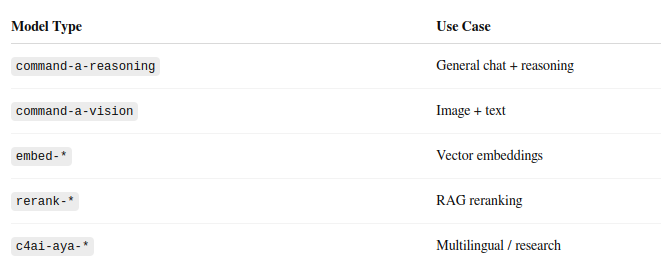

In [ ]:
from langchain_cohere import ChatCohere
import os

os.environ["COHERE_API_KEY"] = os.environ.get("COHERE_API_KEY")

llm = ChatCohere(
    model="command-r-08-2024",
)

response = llm.invoke("Explain transformers in simple terms.")
print(response.content)

Transformers are a type of artificial intelligence model that has revolutionized the field of natural language processing (NLP). They are like super-smart assistants that can understand and generate human language in an incredibly powerful way.

Imagine you have a magical device that can read and write in any language, and it does so with incredible speed and accuracy. That's similar to what transformers can do! Here's a simple breakdown:

1. **Understanding Language**: Transformers can take a piece of text, whether it's a sentence, paragraph, or an entire book, and break it down into smaller parts called "tokens." These tokens are like the building blocks of language. The model then analyzes these tokens to understand the context, grammar, and meaning of the text.

2. **Attention Mechanism**: One of the coolest features of transformers is their "attention" mechanism. It's like the model pays attention to different parts of the text simultaneously. It can focus on the most important wo

In [ ]:
import yfinance as yf

# Get the current market price of Apple stock
apple_stock = yf.Ticker("AAPL")
apple_cmp= apple_stock.info["currentPrice"]
print(apple_cmp)

260.58


In [ ]:
response = llm.invoke("Write a 4 line poem on AI")
response1 = llm.invoke("Craft a quartet of verses celebrating the marvels of artificial intelligence.")
response2 = llm.invoke("Compose a brief, ode to the wonders of AI.")
response3 = llm.invoke("Pen a short poem that captures the essence of artificial intelligence.")
response4 = llm.invoke("Create a succinct tribute to the advancements in AI.")

print("\n======= response =======\n", response)
print("\n======= response1 =======\n", response1)
print("\n======= response2 =======\n", response2)
print("\n======= response3 =======\n", response3)
print("\n======= response4 =======\n", response4)


======= response =======
 content='AI, a wonder, a marvel,\nWith knowledge vast and infinite,\nIt thinks, it learns, it evolves,\nA future bright, it promises.' additional_kwargs={'id': '8928a2fc-2dbe-44c9-94b1-bd9a40c2f0b1', 'finish_reason': 'COMPLETE', 'content': 'AI, a wonder, a marvel,\nWith knowledge vast and infinite,\nIt thinks, it learns, it evolves,\nA future bright, it promises.', 'token_count': {'input_tokens': 208.0, 'output_tokens': 33.0}} response_metadata={'id': '8928a2fc-2dbe-44c9-94b1-bd9a40c2f0b1', 'finish_reason': 'COMPLETE', 'content': 'AI, a wonder, a marvel,\nWith knowledge vast and infinite,\nIt thinks, it learns, it evolves,\nA future bright, it promises.', 'token_count': {'input_tokens': 208.0, 'output_tokens': 33.0}} id='lc_run--019c79ba-511e-7020-8fa3-8ee46e6692c4-0' tool_calls=[] invalid_tool_calls=[] usage_metadata={'input_tokens': 208, 'output_tokens': 33, 'total_tokens': 241}

======= response1 =======
 content="Sure, here is a poetic tribute to the wond

In [ ]:
from langchain_core.prompts import PromptTemplate

template = "Write a 4 line poem on the subject {subject_name}"

prompt = PromptTemplate(
    input_variables=["subject_name"],
    template=template,
)

print(prompt.format(subject_name="Data Science"))
print(prompt.format(subject_name="Fathers Day"))
print(prompt.format(subject_name="Solar System"))

Write a 4 line poem on the subject Data Science
Write a 4 line poem on the subject Fathers Day
Write a 4 line poem on the subject Solar System


In [ ]:
from langchain_core.prompts import PromptTemplate
from langchain_cohere import ChatCohere
import os

os.environ["COHERE_API_KEY"] = os.environ.get("COHERE_API_KEY")

# Create prompt
prompt = PromptTemplate.from_template(
    "Write a 4 line poem about {topic}"
)

# Load model (use model that works with LangChain wrapper)
llm = ChatCohere(
    model="command-r-08-2024",
    temperature=0.2
)

# LCEL chain
chain = prompt | llm

# Run
response = chain.invoke({"topic": "Data Science"})
print(response.content)

Data, a world of endless wonder,
Unveiling secrets, a treasure trove,
With algorithms, we explore and ponder,
A journey of discovery, let's rove.


In [ ]:
# llm=OpenAI(temperature=0.9)
# llm=Cohere(temperature=0.9)

template = "The topic name is {topic}. Explain this topic to a 10 years old kid"
prompt = PromptTemplate(
    input_variables=["topic"],
    template=template,
)

# chain=LLMChain(llm=llm, prompt=prompt)
chain = prompt | llm

# Invoke with dictionary (important!)
result = chain.invoke({"topic": "Logistic Regression"})

# Print response
print(result.content)


Logistic Regression is like a special tool that helps us make predictions and decisions based on some information. It's a bit like a game where we try to guess the answer, but we use some smart rules to make our guesses better. 

Imagine you have a box with two compartments, one for "Yes" and one for "No". You want to put some objects into these compartments, but you don't know which ones should go where. So, you use some clues or rules to decide. For example, if an object is red, it goes to the "Yes" side, and if it's blue, it goes to the "No" side. 

Now, let's say you have a lot of different objects, and you want to figure out a rule to sort them correctly. That's where logistic regression comes in! It's like a super-smart friend who can look at the objects and their colors and tell you the best rule to separate them. It helps us find patterns and make decisions based on those patterns. 

So, in a way, logistic regression is a tool that helps us understand and predict things by usin